In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import xarray as xr
import metpy
from metpy.calc import (
    parcel_profile, cape_cin, wind_speed, bulk_shear
)
from metpy.interpolate import log_interpolate_1d
from metpy.units import units
from metpy.calc import parcel_profile_with_lcl, cape_cin
import netCDF4
import h5netcdf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

from metpy.calc import mixed_parcel
from metpy.calc.thermo import virtual_temperature


In [ ]:
os.getcwd()

In [ ]:
data = xr.open_dataset("CONUS-250hpa-500hpa-gpt-u-v.nc")

In [ ]:
data = data.sel(latitude=slice(50, 25),
                longitude=slice(-105, -75))

## Geopotential height in m, windspeed in knots at 250mb level

In [ ]:
levels = [40, 60, 80, 100, 120, 140]
colors = ['white', 'dodgerblue', 'deepskyblue', 'cyan', 'mediumslateblue', 'purple']
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=levels + [160], ncolors=len(colors))

In [ ]:
# Select 250 hPa level
level = 250
z = data['z'].sel(pressure_level=level) / 9.8      # Geopotential height
u = data['u'].sel(pressure_level=level)       # Zonal wind
v = data['v'].sel(pressure_level=level)       # Meridional wind

lat = data['latitude']
lon = data['longitude']
time = data['valid_time']

# Compute wind speed in m/s and convert to knots
wind_speed = np.sqrt(u**2 + v**2)
wind_speed_knots = wind_speed * 1.94384
u_knots = u * 1.94384
v_knots = v * 1.94384

output_dir = 'D:\\LSU\\Sp_2025\\OCS7001\\OCS-7001-tornado-case-study\\outputs\\250_hpa'

# Loop through each time step
for i in range(len(time)):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 12))

    # Plot wind speed in knots as filled contours
    cf = ax.contourf(
    lon, lat, wind_speed_knots[i],
    levels=levels + [160],
    cmap=cmap, norm=norm,
    extend='max',
    transform=ccrs.PlateCarree()
)

    cbar = plt.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
    cbar.set_label('Windspeed [knots]')

    # Plot geopotential height contours
    cs = ax.contour(
        lon, lat, z[i],
        colors='black', linewidths=1.0,
        transform=ccrs.PlateCarree()
    )
    ax.clabel(cs, inline=True, fontsize=10, fmt='%d')

    # Plot wind barbs in knots (downsampled)
    ax.barbs(
        lon[::5], lat[::5],
        u_knots[i, ::5, ::5], v_knots[i, ::5, ::5],
        length=6, pivot='middle', color='dimgray',
        transform=ccrs.PlateCarree()
    )

    # Add map features
    ax.coastlines(linewidth=1.5, resolution='10m')
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='black',
        facecolor='none'
    )
    ax.add_feature(states_provinces, linewidth=1.0, linestyle='dashed')
    ax.add_feature(cfeature.BORDERS)

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    # Format the title
    plot_time = pd.to_datetime(str(time[i].values)).strftime('%Y-%m-%d %H:%M UTC')
    ax.set_title(f'250 hPa \nValid Time: {plot_time}', fontsize=14)


    # Save figure
    output_path = os.path.join(output_dir, f'figure_{i:02d}.png')
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.close(fig)


## Geopotential height in m, windspeed in knots at 500mb level

In [ ]:
# Select 500 hPa level
level = 500
z = data['z'].sel(pressure_level=level) /9.8      # Geopotential height
u = data['u'].sel(pressure_level=level)       # Zonal wind
v = data['v'].sel(pressure_level=level)       # Meridional wind

lat = data['latitude']
lon = data['longitude']
time = data['valid_time']

# Compute wind speed in m/s and convert to knots
wind_speed = np.sqrt(u**2 + v**2)
wind_speed_knots = wind_speed * 1.94384
u_knots = u * 1.94384
v_knots = v * 1.94384

output_dir = 'D:\\LSU\\Sp_2025\\OCS7001\\OCS-7001-tornado-case-study\\outputs\\500_hpa'

# Loop through each time step
for i in range(len(time)):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 12))

    # Plot wind speed in knots as filled contours
    cf = ax.contourf(
    lon, lat, wind_speed_knots[i],
    levels=levels + [160],
    cmap=cmap, norm=norm,
    extend='max',
    transform=ccrs.PlateCarree()
)

    cbar = plt.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
    cbar.set_label('Windspeed [knots]')

    # Plot geopotential height contours
    cs = ax.contour(
        lon, lat, z[i],
        colors='black', linewidths=1.0,
        transform=ccrs.PlateCarree()
    )
    ax.clabel(cs, inline=True, fontsize=10, fmt='%d')

    # Plot wind barbs in knots (downsampled)
    ax.barbs(
        lon[::5], lat[::5],
        u_knots[i, ::5, ::5], v_knots[i, ::5, ::5],
        length=6, pivot='middle', color='dimgray',
        transform=ccrs.PlateCarree()
    )

    # Add map features
    ax.coastlines(linewidth=1.5, resolution='10m')
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='black',
        facecolor='none'
    )
    ax.add_feature(states_provinces, linewidth=1.0, linestyle='dashed')
    ax.add_feature(cfeature.BORDERS)

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    # Format the title
    plot_time = pd.to_datetime(str(time[i].values)).strftime('%Y-%m-%d %H:%M UTC')
    ax.set_title(f'500 hPa \nValid Time: {plot_time}', fontsize=14)


    # Save figure
    output_path = os.path.join(output_dir, f'figure_{i:02d}.png')
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.close(fig)


## Geopotential height in m, windspeed in knots at 850mb level with surface dewpoint temperature

In [ ]:
data_850hpa = xr.open_dataset("CONUS-850hpa-gpt-u-v.nc")
data_850hpa = data_850hpa.sel(latitude=slice(50, 25),
                longitude=slice(-105, -75))

In [ ]:
data_850hpa

In [ ]:
data_surf_dpt = xr.open_dataset("CONUS-surface-dew-pt-temp.nc")
data_surf_dpt = data_surf_dpt.sel(latitude=slice(50, 25),
                longitude=slice(-105, -75))

In [ ]:
data_surf_dpt = data_surf_dpt['d2m'] 

In [ ]:
data_surf_dpt

In [ ]:
data_850hpa["surf_dpt"] = data_surf_dpt.drop_vars(['number', 'expver'])
data_850hpa

In [ ]:
# Select 850 hPa level
level = 850
z = data_850hpa['z'].sel(pressure_level=level) /9.8      # Geopotential height
u = data_850hpa['u'].sel(pressure_level=level)      # Zonal wind
v = data_850hpa['v'].sel(pressure_level=level)      # Meridional wind
dpt = data_850hpa['surf_dpt'] - 273.15 

lat = data_850hpa['latitude']
lon = data_850hpa['longitude']
time = data_850hpa['valid_time']

# Compute wind speed in m/s and convert to knots
wind_speed = np.sqrt(u**2 + v**2)
wind_speed_knots = wind_speed * 1.94384
u_knots = u * 1.94384
v_knots = v * 1.94384

# Discrete colormap (white -> lime -> green)
levels = [14, 18, 22]
colors = ['white', 'lime', 'green']
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=levels + [26], ncolors=len(colors))

output_dir = 'D:\\LSU\\Sp_2025\\OCS7001\\OCS-7001-tornado-case-study\\outputs\\850_hpa'

for i in range(len(time)):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 12))

    # Plot dew point temperature in °C
    cf = ax.contourf(
        lon, lat, dpt[i],
        levels=levels + [26],
        cmap=cmap, norm=norm,
        extend='max',
        transform=ccrs.PlateCarree()
    )

    cbar = plt.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05, shrink=0.7)
    cbar.set_label('Dew Point Temperature [°C]')

    # Plot geopotential height contours
    cs = ax.contour(
        lon, lat, z[i],
        colors='black', linewidths=1.0,
        transform=ccrs.PlateCarree()
    )
    ax.clabel(cs, inline=True, fontsize=10, fmt='%d')

    # Plot wind barbs
    ax.barbs(
        lon[::5], lat[::5],
        u_knots[i, ::5, ::5], v_knots[i, ::5, ::5],
        length=6, pivot='middle', color='dimgray',
        transform=ccrs.PlateCarree()
    )

    # Map features
    ax.coastlines(linewidth=1.5, resolution='10m')
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='black',
        facecolor='none'
    )
    ax.add_feature(states_provinces, linewidth=1.0, linestyle='dashed')
    ax.add_feature(cfeature.BORDERS)

    # Gridlines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    # Title with level and timestamp
    plot_time = pd.to_datetime(str(time[i].values)).strftime('%Y-%m-%d %H:%M UTC')
    ax.set_title(f'850 hPa Geopotential height, Winds and Surface Dew Point (°C)\nValid Time: {plot_time}', fontsize=14)

    # Save figure
    output_path = os.path.join(output_dir, f'figure_{i:02d}.png')
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.close(fig)

## Sounding at Lake Charles, LA (00 UTC 24 Feb 2016)

In [ ]:
sounding_data = pd.read_csv("Lake-Charles-sounding-2-24-2016-00-UTC.csv")

In [ ]:
sounding_data = sounding_data.dropna()

In [ ]:
p = sounding_data['PRES'].values * units.hPa
T = sounding_data['TEMP'].values * units.degC
Td = sounding_data['DWPT'].values * units.degC
wind_speed = sounding_data['SPED'].values * 1.94 * units.knots
wind_dir = sounding_data['DRCT'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)
height = sounding_data['HGHT'].values * 0.000305 * units.km

In [ ]:
def manual_effective_inflow_layer(p, T, Td):
    """
    Calculate the effective inflow layer based on CAPE > 100 J/kg and CIN < 250 J/kg
    for all parcels in the profile.

    Parameters
    ----------
    p : array (hPa)
        Pressure profile
    T : array (degC)
        Temperature profile
    Td : array (degC)
        Dewpoint profile

    Returns
    -------
    (p_bot, p_top): Tuple of pressure at bottom and top of effective inflow layer
                    or (None, None) if no effective layer found.
    """

    effective_layers = []
    for i in range(len(p)):
        prof = parcel_profile(p[i:], T[i], Td[i])
        cape, cin = cape_cin(p[i:], T[i:], Td[i:], prof)

        if cape.m > 100 and cin.m > -250:  # Note: CIN is negative
            effective_layers.append(p[i])

    if len(effective_layers) == 0:
        return None, None

    return effective_layers[0], effective_layers[-1]  # bottom, top


In [64]:
bottom, top = manual_effective_inflow_layer(p, T, Td)
print(f"Effective Inflow Layer Bottom: {bottom}")
print(f"Effective Inflow Layer Top: {top}")

Effective Inflow Layer Bottom: 998.0 hectopascal
Effective Inflow Layer Top: 879.0 hectopascal


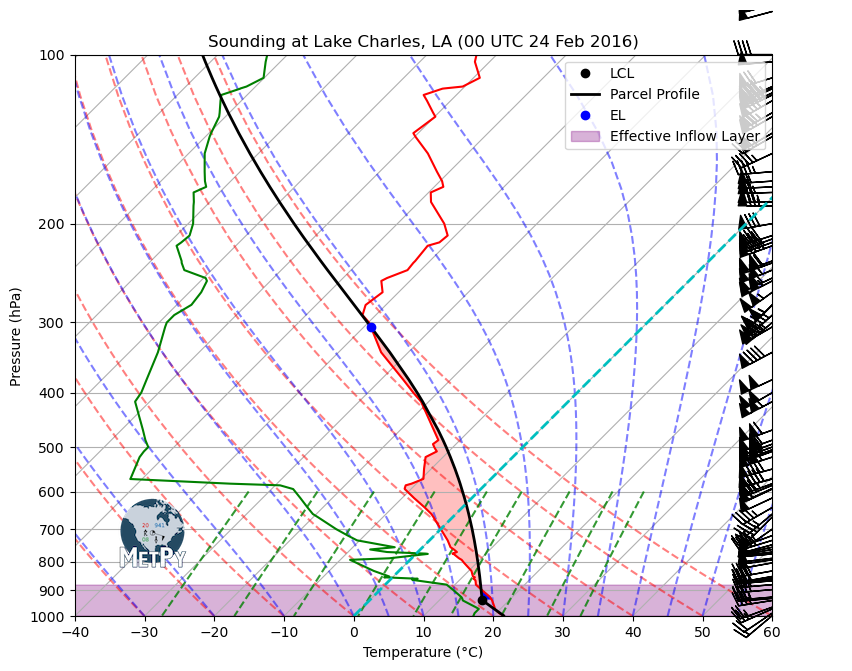

In [62]:
fig = plt.figure(figsize=(9, 9))
add_metpy_logo(fig, 115, 100)
skew = SkewT(fig, rotation=45)

# Plot the data
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Set axis labels
skew.ax.set_xlabel(f'Temperature ({T.units:~P})')
skew.ax.set_ylabel(f'Pressure ({p.units:~P})')

# Calculate LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black', label='LCL')

# Calculate parcel profile
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2, label='Parcel Profile')

# Calculate EL
el_pressure, el_temperature = mpcalc.el(p, T, Td)
if el_pressure is not None:
    skew.plot(el_pressure, el_temperature, 'bo', markerfacecolor='blue', label='EL')

# Calculate effective inflow layer and shade
p_bot, p_top = manual_effective_inflow_layer(p, T, Td)
if p_bot is not None and p_top is not None:
    skew.ax.fill_betweenx(
        [p_bot.m, p_top.m],
        -50, 60,
        color='purple',
        alpha=0.3,
        label='Effective Inflow Layer'
    )
# Shade CIN (light transparent blue)
skew.shade_cin(p, T, prof, Td, color='blue', alpha=1)

# Shade CAPE (light transparent red)
skew.shade_cape(p, T, prof, color='red', alpha=0.25)

# Add zero isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add reference lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Title and legend
plt.title("Sounding at Lake Charles, LA (00 UTC 24 Feb 2016)")
plt.legend(loc='upper right')
plt.show()


## Bulk shear between 1000 and 875 hPa

In [78]:
data = xr.open_dataset("CONUS-1000hpa-875hpa-gpt-u-v.nc")

In [79]:
data = data.sel(pressure_level=[1000, 875])

In [80]:
data = data.sel(latitude=slice(50, 25),
                longitude=slice(-105, -75))

In [81]:
# Extract variables and assign units
u = data['u'].metpy.quantify().metpy.convert_units('m/s')  # zonal wind
v = data['v'].metpy.quantify().metpy.convert_units('m/s')  # meridional wind
p = data['pressure_level'].values * units.hPa

# Ensure pressure axis is correct (from high to low pressure)
u = u.metpy.sel(vertical=p)
v = v.metpy.sel(vertical=p)

# Convert to wind components in the desired pressure layer (1000 to 875 hPa)
u_lower = u.sel(pressure_level=1000)
u_upper = u.sel(pressure_level=875)
v_lower = v.sel(pressure_level=1000)
v_upper = v.sel(pressure_level=875)

# Compute shear (magnitude of vector difference)
shear_u = u_upper - u_lower
shear_v = v_upper - v_lower
bulk_shear = np.sqrt(shear_u**2 + shear_v**2)


In [82]:
bulk_shear = bulk_shear * 1.94384

In [84]:
time = bulk_shear["valid_time"]
lat = bulk_shear["latitude"]
lon = bulk_shear["longitude"]

# === Create output directory if it doesn't exist ===
output_dir = "D:\\LSU\\Sp_2025\\OCS7001\\OCS-7001-tornado-case-study\\outputs\\1000hpa-875hpa-bulk-shear"


# === Plot and save images for each time step ===
for i in range(bulk_shear.sizes["valid_time"]):
    shear_snapshot = bulk_shear.isel(valid_time=i)

    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

    # Filled contour with fixed range 0–60 knots
    cf = ax.contourf(
        lon, lat, shear_snapshot,
        levels=np.linspace(0, 60, 13),  # 0, 5, ..., 60
        cmap='coolwarm',
        extend='max',
        transform=ccrs.PlateCarree()
    )

    # Add map features
    ax.coastlines(linewidth=1.5, resolution='10m')
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='black',
        facecolor='none'
    )
    ax.add_feature(states_provinces, linewidth=1.0, linestyle='dashed')
    ax.add_feature(cfeature.BORDERS, linewidth=1.2)

    # Gridlines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    # Title with valid timestamp
    plot_time = pd.to_datetime(str(time[i].values)).strftime('%Y-%m-%d %H:%M UTC')
    ax.set_title(f'1000 hPa–875 hPa Bulk Shear (knots)\nValid Time: {plot_time}', fontsize=14)

    # Add colorbar
    cbar = plt.colorbar(cf, ax=ax, orientation='vertical', shrink=0.8, pad=0.03)
    cbar.set_label("Bulk Shear (knots)", fontsize=11)

    # Save figure
    plt.savefig(f"{output_dir}/bulk_shear_timestep_{i:03d}.png", dpi=150, bbox_inches="tight")
    plt.close()